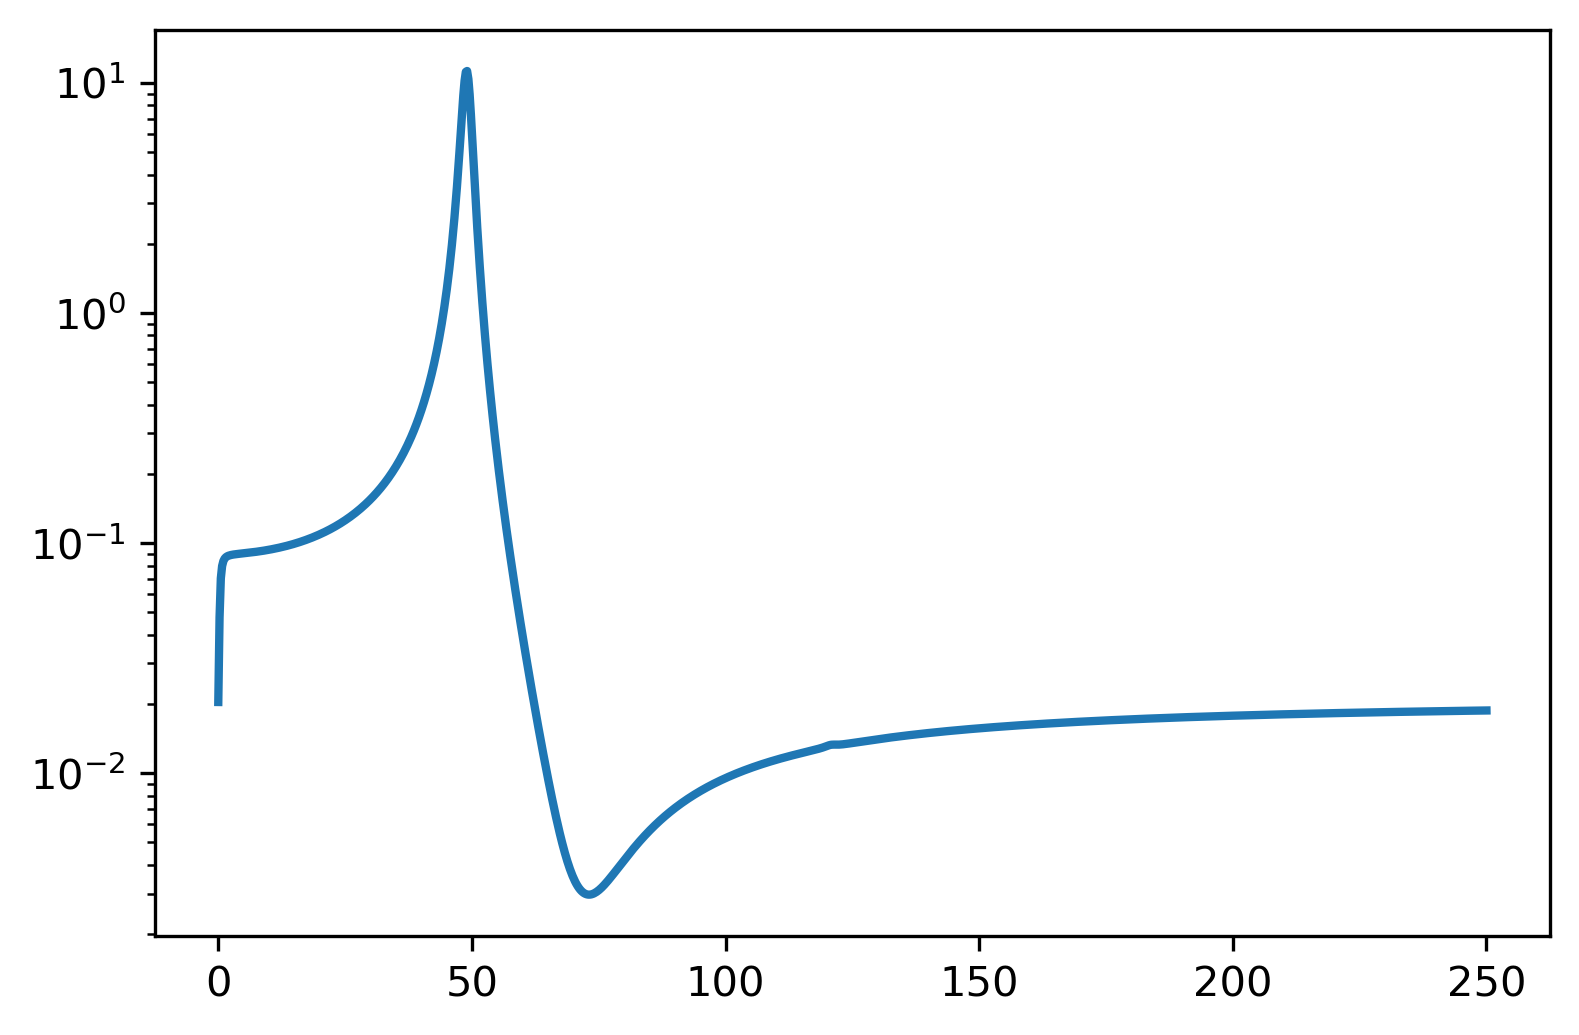

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import math



#DIMENSÃO DO SISTEMA#
N = 7  #Dimensão do espaço de Hilbert da cavidade
NA = 1 #Número de átomos
idatomA = qeye(3) #Operador identidade do átomo A
ida = qeye(N) #Operador identidade do campo
M = N*3^(NA) #Dimensão total do sistema átomo-campo
nloop = 1000 #Número de passos em DeltaP

#PARÂMETROS DO HAMILTONIANO#
g = 50.0 #Acoplamento átomo-campo (transição atômica 1<->3
E = 1#Campo de prova
O = 250.0 #Frequência de Rabi do campo de controle
D1 = 0.0 #Dessintonia entre átomo e cavidade (w0-wp)
D2 = 0.0 #Dessintonia entre átomo e campo de controle (w0-wc)
Dp = 70.0 #Variação de DP -> Dessintonia entre modo da cavidade e campo de prova
OList= np.linspace(0,O,nloop) #Divisão dos passos

#PARÂMETROS DA EQUAÇÃO MESTRA - Taxa de decaimento e dissipação#
Gamma31 = 0.1 #Taxa de decaimento 3 -> 1
Gamma32 = 0.1 #Taxa de decaimento 3 -> 2
gamma2 = 0.0 #Taxa de defasagem - level 2
gamma3 = 0.0 #Taxa de defasagem - level 3
kappa =1.0 #Decaimento da cavidade

#OPERADORES ATÔMICOS#
#|1> e |2> =  estado fundamental e |3> = estado excitado. base {1,2,3}
#S13 = |1><3|,S31 = S13', S23 = |1><3, S32=S23'
s12=Qobj([[0,1,0],[0,0,0],[0,0,0]])
s13=Qobj([[0,0,1],[0,0,0],[0,0,0]])
s23=Qobj([[0,0,0],[0,0,1],[0,0,0]])

#Átomo A#
S13A = tensor(ida,s13) #sigma13
S23A = tensor(ida,s23) #sigma23
S11A = S13A*S13A.dag() #sigma11
S22A = S23A*S23A.dag()#sigma22
S33A = S23A.dag()*S23A #sigma33

#OPERADORES DO MODO DA CAVIDADE#
a=tensor(destroy(N),idatomA)

#EQUAÇÃO MESTRA = ÁTOMO DE 2 NÍVEIS + MODO DA CAVIDADE#

# Colapse Operators
C1 = math.sqrt(2*kappa)*a      #cavity mode 
C31 = math.sqrt(2*Gamma31)*S13A  #decaimento atom 31
C32 = math.sqrt(2*Gamma32)*S23A  #decaient0 atom 32
C22 = math.sqrt(2*gamma2)*S22A  #defasagem atom 22
C33 = math.sqrt(2*gamma3)*S33A  #defasagem atom 33

C_list = [C1, C31, C32, C22, C33]

#HAMILTONIANO#
H1 =  D1*(S33A) + D1*S22A - D2*(S22A) + g*S13A.dag()*a + g*a.dag()*S13A + E*a+E*a.dag() + Dp*S11A - Dp*(a.dag()*a) #Interação 

#SIMULAÇÃO#
T=[]
for k in range(0,nloop):
    Oc=OList[k] #passos
    H= Oc*S23A + Oc*S23A.dag()+ H1 #Hamiltoniano total
    rhoss=steadystate(H, C_list) #Retorna a matriz densidade representando o estado estacionário do Liouviliano (eu espero)
    Transmiss= expect(a.dag()*a, rhoss)/((E/kappa)**2) #Transmissão normalizada
    Tr= Transmiss.real*100
    T+=[Tr]



#PLOT#
plt.figure(1, dpi=300)
plt.plot(OList,T, linewidth=2 )
plt.yscale("log")
plt.savefig('Figure.png', format='png')